In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%pylab inline

loan_data = pd.read_csv('prosperLoanData.csv')

Populating the interactive namespace from numpy and matplotlib


In [3]:
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
len(loan_data)

113937

In [5]:
loan_data.columns

Index([u'ListingKey', u'ListingNumber', u'ListingCreationDate', u'CreditGrade',
       u'Term', u'LoanStatus', u'ClosedDate', u'BorrowerAPR', u'BorrowerRate',
       u'LenderYield', u'EstimatedEffectiveYield', u'EstimatedLoss',
       u'EstimatedReturn', u'ProsperRating (numeric)',
       u'ProsperRating (Alpha)', u'ProsperScore', u'ListingCategory (numeric)',
       u'BorrowerState', u'Occupation', u'EmploymentStatus',
       u'EmploymentStatusDuration', u'IsBorrowerHomeowner',
       u'CurrentlyInGroup', u'GroupKey', u'DateCreditPulled',
       u'CreditScoreRangeLower', u'CreditScoreRangeUpper',
       u'FirstRecordedCreditLine', u'CurrentCreditLines', u'OpenCreditLines',
       u'TotalCreditLinespast7years', u'OpenRevolvingAccounts',
       u'OpenRevolvingMonthlyPayment', u'InquiriesLast6Months',
       u'TotalInquiries', u'CurrentDelinquencies', u'AmountDelinquent',
       u'DelinquenciesLast7Years', u'PublicRecordsLast10Years',
       u'PublicRecordsLast12Months', u'RevolvingCredi

In [6]:
loan_data['InvestmentFromFriendsCount'].isnull().sum()

0

In [7]:
(loan_data['InvestmentFromFriendsCount'] > 0).sum()

2131

In [8]:
loan_data['InvestmentFromFriendsAmount'].sum()

1885742.8900000001

In [9]:
(loan_data['Investors'] > 0).sum()

113937

In [10]:
loan_data = loan_data[[
'ListingKey'
,'ListingCreationDate'
,'Term'
,'LoanStatus'
,'ClosedDate'
,'BorrowerAPR'
,'BorrowerRate'
,'ListingCategory (numeric)'
,'BorrowerState'
,'Occupation'
,'EmploymentStatus'
,'EmploymentStatusDuration'
,'IsBorrowerHomeowner'
,'DateCreditPulled'
,'CreditScoreRangeLower'
,'CreditScoreRangeUpper'
,'CurrentDelinquencies'
,'AmountDelinquent'
,'TradesNeverDelinquent (percentage)'
,'TradesOpenedLast6Months'
,'DebtToIncomeRatio'
,'IncomeRange'
,'TotalProsperLoans'
,'TotalProsperPaymentsBilled'
,'OnTimeProsperPayments'
,'ProsperPaymentsLessThanOneMonthLate'
,'ProsperPaymentsOneMonthPlusLate'
,'ProsperPrincipalBorrowed'
,'ProsperPrincipalOutstanding'
,'LoanCurrentDaysDelinquent'
,'LoanFirstDefaultedCycleNumber'
,'LoanMonthsSinceOrigination'
,'LoanOriginalAmount'
,'LoanOriginationDate'
,'LoanOriginationQuarter'
,'MonthlyLoanPayment'
,'LP_ServiceFees'
,'LP_CollectionFees'
,'PercentFunded'
,'InvestmentFromFriendsCount'
,'InvestmentFromFriendsAmount'
,'Investors']]

In [11]:
loan_data['pct_friends'] = loan_data['InvestmentFromFriendsCount'] / loan_data['Investors']

In [12]:
(loan_data['pct_friends'] > 0).sum()

2131

In [13]:
loan_data['pct_friends'].sort_values(ascending=False)

42970     1.0
59855     1.0
69689     1.0
88022     1.0
10278     1.0
81390     1.0
40808     1.0
5380      1.0
65259     1.0
15993     1.0
98696     1.0
113704    1.0
39248     1.0
97691     1.0
97748     1.0
112717    1.0
96548     1.0
102008    1.0
61594     1.0
92881     1.0
105731    1.0
5241      1.0
63514     1.0
100390    1.0
3455      1.0
60200     1.0
13204     1.0
44141     1.0
93707     1.0
9475      1.0
         ... 
75628     0.0
75629     0.0
75605     0.0
75604     0.0
75603     0.0
75602     0.0
75579     0.0
75580     0.0
75581     0.0
75582     0.0
75583     0.0
75584     0.0
75585     0.0
75586     0.0
75587     0.0
75588     0.0
75589     0.0
75590     0.0
75591     0.0
75592     0.0
75593     0.0
75594     0.0
75595     0.0
75596     0.0
75597     0.0
75598     0.0
75599     0.0
75600     0.0
75601     0.0
0         0.0
Name: pct_friends, dtype: float64

In [14]:
loan_data['pct_friends'].quantile(.999)

0.3333333333333333

In [15]:
(loan_data['LoanStatus'] == 'Cancelled').sum()

5

In [16]:
loan_data['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [17]:
loan_data = loan_data[loan_data['LoanStatus'] != 'Cancelled']

In [18]:
len(loan_data)

113932

In [19]:
# can combine completed and finalpaymentinprogress as completed
# can combine chargedoff and defaulted as default
# all past dues into a late category
# current into a current category
map_status = {'FinalPaymentInProgress': 'Completed', 'Chargedoff': 'Defaulted', 'Past Due (1-15 days)': 'Late',
              'Past Due (16-30 days)': 'Late',
              'Past Due (61-90 days)': 'Late', 'Past Due (31-60 days)': 'Late', 
              'Past Due (91-120 days)': 'Late', 'Past Due (>120 days)': 'Late'}

loan_data['LoanStatus'] = loan_data['LoanStatus'].apply(lambda x: map_status.get(x, x))

In [20]:
loan_data.corr()['InvestmentFromFriendsCount']

Term                                  -0.043509
BorrowerAPR                           -0.046758
BorrowerRate                          -0.037313
ListingCategory (numeric)             -0.018971
EmploymentStatusDuration              -0.031432
IsBorrowerHomeowner                   -0.010383
CreditScoreRangeLower                 -0.013168
CreditScoreRangeUpper                 -0.013168
CurrentDelinquencies                   0.013344
AmountDelinquent                       0.007140
TradesNeverDelinquent (percentage)    -0.032959
TradesOpenedLast6Months                0.007739
DebtToIncomeRatio                      0.034169
TotalProsperLoans                     -0.000098
TotalProsperPaymentsBilled            -0.014361
OnTimeProsperPayments                 -0.012824
ProsperPaymentsLessThanOneMonthLate   -0.012119
ProsperPaymentsOneMonthPlusLate       -0.009479
ProsperPrincipalBorrowed              -0.009109
ProsperPrincipalOutstanding           -0.018161
LoanCurrentDaysDelinquent              0

In [21]:
stats.f_oneway(loan_data[loan_data.LoanStatus == 'Completed']['InvestmentFromFriendsCount'], 
               loan_data[loan_data.LoanStatus == 'Defaulted']['InvestmentFromFriendsCount'], 
               loan_data[loan_data.LoanStatus == 'Late']['InvestmentFromFriendsCount'], 
               loan_data[loan_data.LoanStatus == 'Current']['InvestmentFromFriendsCount'])

F_onewayResult(statistic=362.28943528607329, pvalue=3.3617904864660548e-234)

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [23]:
print pairwise_tukeyhsd(loan_data['InvestmentFromFriendsCount'], loan_data['LoanStatus'])

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower   upper  reject
---------------------------------------------------
Completed  Current  -0.0492  -0.0531 -0.0452  True 
Completed Defaulted -0.0175   -0.023  -0.012  True 
Completed    Late    -0.049  -0.0624 -0.0355  True 
 Current  Defaulted  0.0317   0.0265  0.0368  True 
 Current     Late    0.0002  -0.0131  0.0135 False 
Defaulted    Late   -0.0314  -0.0453 -0.0176  True 
---------------------------------------------------


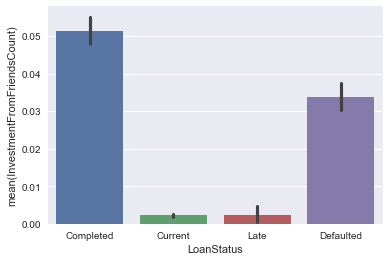

In [24]:
sns.barplot(loan_data['LoanStatus'], loan_data['InvestmentFromFriendsCount'])

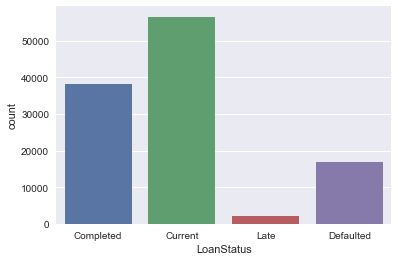

In [25]:
sns.countplot(loan_data['LoanStatus'])

In [26]:
loan_data_friends = loan_data[loan_data['InvestmentFromFriendsCount'] > 0]

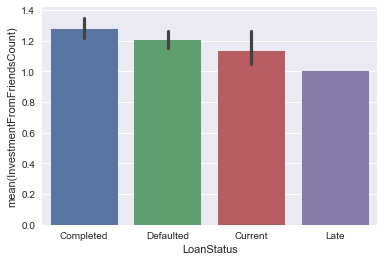

In [27]:
sns.barplot(loan_data_friends['LoanStatus'], loan_data_friends['InvestmentFromFriendsCount'])

In [28]:
(loan_data_friends.groupby(['LoanStatus']).count()/len(loan_data_friends))['ListingKey']

LoanStatus
Completed    0.721727
Current      0.051619
Defaulted    0.224308
Late         0.002346
Name: ListingKey, dtype: float64

In [29]:
(loan_data.groupby(['LoanStatus']).count()/len(loan_data))['ListingKey']

LoanStatus
Completed    0.335981
Current      0.496577
Defaulted    0.149300
Late         0.018142
Name: ListingKey, dtype: float64

In [30]:
loan_data_no_friends = loan_data[loan_data['InvestmentFromFriendsCount'] == 0]

In [31]:
(loan_data_no_friends.groupby(['LoanStatus']).count()/len(loan_data_no_friends))['ListingKey']

LoanStatus
Completed    0.328629
Current      0.505058
Defaulted    0.147870
Late         0.018443
Name: ListingKey, dtype: float64

In [32]:
loan_data['ListingCreationDate'] = pd.to_datetime(loan_data['ListingCreationDate'])

In [33]:
loan_data_friends['ListingCreationDate'].sort_values()

106599    2007-02-05 12:19:11.883000000
36059     2007-02-07 10:22:46.997000000
22979     2007-02-07 12:03:49.340000000
13873     2007-02-07 13:59:54.463000000
62165     2007-02-09 16:38:16.453000000
71505     2007-02-11 18:24:48.180000000
83910     2007-02-12 06:35:11.373000000
73524     2007-02-12 18:42:38.877000000
97471     2007-02-15 19:21:19.743000000
52504     2007-02-15 20:24:34.703000000
55891     2007-02-16 07:30:53.640000000
89037     2007-02-16 12:26:52.127000000
94522     2007-02-16 12:30:51.810000000
37859     2007-02-18 13:12:23.720000000
1316      2007-02-18 17:17:43.283000000
67966     2007-02-18 19:29:20.727000000
79364     2007-02-19 13:43:05.810000000
48679     2007-02-20 09:13:51.920000000
3858      2007-02-20 13:42:54.477000000
83675     2007-02-20 16:03:29.673000000
109128    2007-02-20 18:06:26.577000000
69435     2007-02-20 18:14:44.927000000
16803     2007-02-20 20:22:36.820000000
82660     2007-02-21 08:56:08.313000000
106269    2007-02-21 16:40:45.343000000


In [34]:
loan_data['ListingCreationDate'] = loan_data['ListingCreationDate'].apply(lambda x: x.year)

In [35]:
loan_data_friends['ListingCreationDate'].value_counts(sort=False).sort_index()/ loan_data['ListingCreationDate'].value_counts(sort=False).sort_index()

2005                            NaN
2006                            NaN
2007                            NaN
2008                            NaN
2009                            NaN
2010                            NaN
2011                            NaN
2012                            NaN
2013                            NaN
2014                            NaN
2007-02-05 12:19:11.883000000   NaN
2007-02-07 10:22:46.997000000   NaN
2007-02-07 12:03:49.340000000   NaN
2007-02-07 13:59:54.463000000   NaN
2007-02-09 16:38:16.453000000   NaN
2007-02-11 18:24:48.180000000   NaN
2007-02-12 06:35:11.373000000   NaN
2007-02-12 18:42:38.877000000   NaN
2007-02-15 19:21:19.743000000   NaN
2007-02-15 20:24:34.703000000   NaN
2007-02-16 07:30:53.640000000   NaN
2007-02-16 12:26:52.127000000   NaN
2007-02-16 12:30:51.810000000   NaN
2007-02-18 13:12:23.720000000   NaN
2007-02-18 17:17:43.283000000   NaN
2007-02-18 19:29:20.727000000   NaN
2007-02-19 13:43:05.810000000   NaN
2007-02-20 09:13:51.92000000

In [36]:
loan_data_no_friends['ListingCreationDate'].value_counts(sort=False).sort_index()/loan_data['ListingCreationDate'].value_counts(sort=False).sort_index()

2005                            NaN
2006                            NaN
2007                            NaN
2008                            NaN
2009                            NaN
2010                            NaN
2011                            NaN
2012                            NaN
2013                            NaN
2014                            NaN
2005-11-09 20:44:28.847000000   NaN
2005-11-11 08:46:17.303000000   NaN
2005-11-15 16:06:47.457000000   NaN
2005-11-15 18:25:56.107000000   NaN
2005-11-18 13:39:03.263000000   NaN
2005-11-18 14:10:50.470000000   NaN
2005-11-18 14:16:59.093000000   NaN
2005-11-18 14:22:34.763000000   NaN
2005-11-18 14:48:19.753000000   NaN
2005-11-18 16:35:48.210000000   NaN
2005-11-20 13:21:31.993000000   NaN
2005-11-20 14:45:55.193000000   NaN
2005-11-20 20:15:47.240000000   NaN
2005-11-21 19:35:46.890000000   NaN
2005-11-28 16:16:35.077000000   NaN
2005-11-28 17:25:43.160000000   NaN
2005-11-28 22:42:42.557000000   NaN
2005-11-29 13:29:16.81000000

In [37]:
#2007, 2008, 2009, 2010 had some levels of friends loaning
loan_data['ListingCreationDate'].unique()

array([2007, 2014, 2012, 2013, 2006, 2010, 2011, 2008, 2009, 2005], dtype=int64)

In [38]:
loan_data = loan_data[loan_data['ListingCreationDate'].isin([2008])]

In [39]:
loan_data = loan_data[loan_data['LoanStatus'].isin(['Completed', 'Defaulted'])]

In [40]:
len(loan_data)

11262

In [41]:
loan_data_no_friends = loan_data[loan_data['InvestmentFromFriendsCount'] == 0]
loan_data_friends = loan_data[loan_data['InvestmentFromFriendsCount'] > 0]

In [42]:
len(loan_data_no_friends)

10439

In [43]:
len(loan_data_friends)

823

In [44]:
(loan_data.groupby(['LoanStatus']).count()/len(loan_data))['ListingKey']

LoanStatus
Completed    0.672172
Defaulted    0.327828
Name: ListingKey, dtype: float64

In [45]:
(loan_data_friends.groupby(['LoanStatus']).count()/len(loan_data_friends))['ListingKey']

LoanStatus
Completed    0.7339
Defaulted    0.2661
Name: ListingKey, dtype: float64

In [46]:
(loan_data_no_friends.groupby(['LoanStatus']).count()/len(loan_data_no_friends))['ListingKey']

LoanStatus
Completed    0.667305
Defaulted    0.332695
Name: ListingKey, dtype: float64

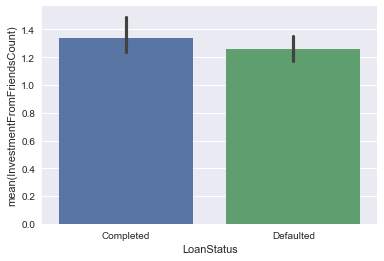

In [47]:
sns.barplot(loan_data_friends['LoanStatus'], loan_data_friends['InvestmentFromFriendsCount'])

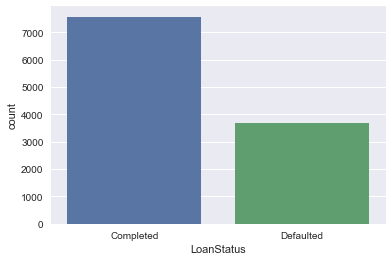

In [48]:
sns.countplot(loan_data['LoanStatus'])

In [49]:
stats.f_oneway(loan_data[loan_data.LoanStatus == 'Completed']['InvestmentFromFriendsCount'], 
               loan_data[loan_data.LoanStatus == 'Defaulted']['InvestmentFromFriendsCount'])

F_onewayResult(statistic=9.9480832195441842, pvalue=0.0016144028892340998)

In [50]:
loan_data.groupby('LoanStatus')['InvestmentFromFriendsCount'].mean()

LoanStatus
Completed    0.107001
Defaulted    0.074485
Name: InvestmentFromFriendsCount, dtype: float64

In [51]:
stats.ttest_ind(loan_data[loan_data.LoanStatus == 'Completed']['InvestmentFromFriendsCount'],
                loan_data[loan_data.LoanStatus == 'Defaulted']['InvestmentFromFriendsCount'])
stats.ttest_ind(loan_data[loan_data.LoanStatus == 'Completed']['InvestmentFromFriendsAmount'],
                loan_data[loan_data.LoanStatus == 'Defaulted']['InvestmentFromFriendsAmount'])

Ttest_indResult(statistic=1.4816625246822501, pvalue=0.13845809597491024)

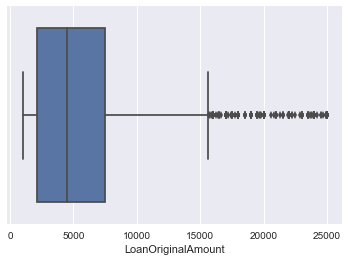

In [52]:
# LoanStatus, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, ListingCreationDate, LoanOriginalAmount
sns.boxplot(loan_data['LoanOriginalAmount'])

#x-axis dollar amount
#y-axis investmentfromfriendscount

In [53]:
loan_data['LoanStatus'] = loan_data['LoanStatus'].apply(lambda x: {'Completed':1,'Defaulted':0}.get(x, x))

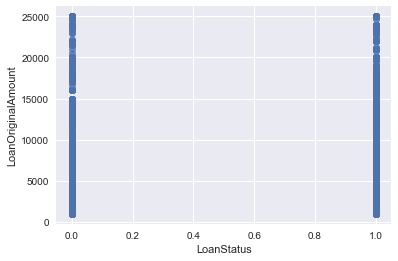

In [54]:
sns.regplot(loan_data['LoanStatus'], loan_data['LoanOriginalAmount'], fit_reg=False)

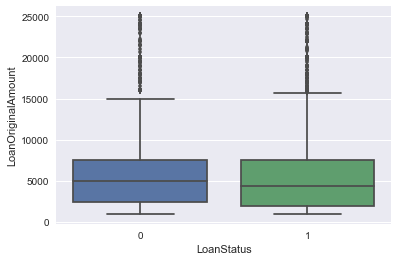

In [55]:
sns.boxplot(loan_data['LoanStatus'], loan_data['LoanOriginalAmount'])

In [56]:
loan_data['InvestmentFromFriendsCount'].value_counts()

0     10439
1       684
2        98
3        19
4        11
5         4
7         2
9         2
6         1
13        1
33        1
Name: InvestmentFromFriendsCount, dtype: int64

In [57]:
loan_data['FriendsInvolved'] = loan_data['InvestmentFromFriendsCount'] > 0

In [58]:
loan_data['FriendsInvolved'] = loan_data['FriendsInvolved'].astype(float)

In [59]:
loan_data['FriendsInvolved']

46        1.0
78        0.0
108       0.0
117       0.0
121       0.0
123       0.0
127       0.0
131       0.0
132       0.0
136       0.0
142       0.0
150       0.0
156       0.0
241       0.0
258       0.0
259       0.0
261       0.0
320       0.0
324       0.0
330       0.0
341       0.0
345       0.0
346       0.0
362       0.0
367       0.0
369       0.0
372       0.0
380       0.0
395       0.0
400       0.0
         ... 
113655    1.0
113662    0.0
113678    0.0
113693    0.0
113704    1.0
113711    0.0
113715    0.0
113716    0.0
113767    1.0
113785    0.0
113786    0.0
113799    0.0
113803    0.0
113804    0.0
113809    0.0
113823    0.0
113830    0.0
113839    0.0
113843    0.0
113859    0.0
113878    0.0
113879    0.0
113896    0.0
113897    1.0
113906    0.0
113915    0.0
113918    0.0
113922    0.0
113923    0.0
113927    0.0
Name: FriendsInvolved, dtype: float64

In [60]:
loan_data.corr()['FriendsInvolved']

ListingCreationDate                         NaN
Term                                  -0.033561
LoanStatus                             0.036923
BorrowerAPR                           -0.035050
BorrowerRate                          -0.036241
ListingCategory (numeric)             -0.000857
EmploymentStatusDuration              -0.035040
IsBorrowerHomeowner                   -0.034460
CreditScoreRangeLower                 -0.022285
CreditScoreRangeUpper                 -0.022285
CurrentDelinquencies                   0.041929
AmountDelinquent                       0.023589
TradesNeverDelinquent (percentage)    -0.036694
TradesOpenedLast6Months               -0.026526
DebtToIncomeRatio                      0.016298
TotalProsperLoans                      0.009696
TotalProsperPaymentsBilled            -0.025434
OnTimeProsperPayments                 -0.028037
ProsperPaymentsLessThanOneMonthLate    0.026101
ProsperPaymentsOneMonthPlusLate       -0.015358
ProsperPrincipalBorrowed               0

In [61]:
stats.ttest_ind(loan_data[loan_data.LoanStatusNum == 1]['FriendsInvolvedNum'],
                loan_data[loan_data.LoanStatusNum == 0]['FriendsInvolvedNum'])

AttributeError: 'DataFrame' object has no attribute 'LoanStatusNum'

In [ ]:
loan_data.groupby('LoanStatus').mean()['FriendsInvolved']

In [ ]:
loan_data[loan_data['FriendsInvolved'] == 1].mean()['LoanStatus']

In [ ]:
loan_data[loan_data['FriendsInvolved'] == 0].mean()['LoanStatus']

In [ ]:
stats.ttest_ind(loan_data[loan_data.FriendsInvolved == 1]['LoanStatus'],
                loan_data[loan_data.FriendsInvolved == 0]['LoanStatus'])

In [ ]:
# LoanStatus boolean
# FriendsInvolved boolean
# InvestmentFromFriendsAmount, ListingCreationDate, LoanOriginalAmount

# completed loans no friends, completed friends, defaulted no friend, defaulted friends
loan_data.groupby(['LoanStatus', 'FriendsInvolved']).count()

In [ ]:
# all data, just friends, just no friends
sns.regplot('LoanOriginalAmount', 'FriendsInvolved', data=loan_data, fit_reg=False)

In [62]:
loan_data = loan_data[['ListingKey', 'LoanStatus', 'FriendsInvolved', 'LoanOriginalAmount', 'ListingCreationDate']]

In [63]:
len(loan_data_friends)

823

In [64]:
len(loan_data_no_friends)

10439

In [ ]:
#loan status, 
#friends contributed/no friends contributed, 
#with friends loan status, 
#with no friends loan status, 
#split two way as proportions, Defaulted/Paid at bottom, Stack Friends and No Friends Proportions

In [65]:
loan_data['LoanStatus'] = loan_data['LoanStatus'].apply(lambda x: {0:'Defaulted', 1:'Paid'}.get(x,x))

C:\Users\Erik\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [66]:
loan_data['FriendsInvolved'] = loan_data['FriendsInvolved'].apply(lambda x: {0:'False', 1:'True'}.get(x,x))

C:\Users\Erik\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [67]:
loan_data['FriendsAndStatus'] = loan_data['LoanStatus'] + "/" + loan_data['FriendsInvolved']

C:\Users\Erik\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
loan_data

,ListingKey,LoanStatus,FriendsInvolved,LoanOriginalAmount,ListingCreationDate,FriendsAndStatus
46,0F8B34281015537050D4FEC,Paid,True,4000,2008,Paid/True
78,0DFE3425061927556BB8A75,Defaulted,False,4800,2008,Defaulted/False
108,10C034203841683992703F1,Paid,False,14000,2008,Paid/False
117,0F4B341445393357179A9C5,Paid,False,2000,2008,Paid/False
121,119034109962969937581AB,Paid,False,4000,2008,Paid/False
123,10D6343087886921049544C,Paid,False,12000,2008,Paid/False
127,10F83416199324455232962,Defaulted,False,2551,2008,Defaulted/False
131,11193430644352832E11281,Paid,False,12500,2008,Paid/False
132,10F1341448577160837015D,Paid,False,8600,2008,Paid/False
136,11033424414557921FA7656,Paid,False,3000,2008,Paid/False


In [69]:
loan_data['ListingCreationDate'].value_counts()
loan_data = loan_data[loan_data['ListingCreationDate'] == 2008]

In [70]:
loan_data['FriendsInvolvedNum'] = loan_data['FriendsInvolved'].apply(lambda x: {'False':0, 'True':1}.get(x,x))

In [71]:
loan_data['LoanStatusNum'] = loan_data['LoanStatus'].apply(lambda x: {'Paid':1, 'Defaulted':0}.get(x,x))

In [72]:
loan_data

,ListingKey,LoanStatus,FriendsInvolved,LoanOriginalAmount,ListingCreationDate,FriendsAndStatus,FriendsInvolvedNum,LoanStatusNum
46,0F8B34281015537050D4FEC,Paid,True,4000,2008,Paid/True,1,1
78,0DFE3425061927556BB8A75,Defaulted,False,4800,2008,Defaulted/False,0,0
108,10C034203841683992703F1,Paid,False,14000,2008,Paid/False,0,1
117,0F4B341445393357179A9C5,Paid,False,2000,2008,Paid/False,0,1
121,119034109962969937581AB,Paid,False,4000,2008,Paid/False,0,1
123,10D6343087886921049544C,Paid,False,12000,2008,Paid/False,0,1
127,10F83416199324455232962,Defaulted,False,2551,2008,Defaulted/False,0,0
131,11193430644352832E11281,Paid,False,12500,2008,Paid/False,0,1
132,10F1341448577160837015D,Paid,False,8600,2008,Paid/False,0,1
136,11033424414557921FA7656,Paid,False,3000,2008,Paid/False,0,1


In [ ]:
stats.ttest_ind(loan_data[loan_data['FriendsInvolvedNum'] == 1]['LoanStatusNum'],
                loan_data[loan_data['FriendsInvolvedNum'] == 0]['LoanStatusNum'])

In [73]:
loan_data[loan_data['FriendsInvolvedNum'] == 1]['LoanStatusNum'].mean()

0.73390036452004859

In [74]:
loan_data[loan_data['FriendsInvolvedNum'] == 0]['LoanStatusNum'].mean()

0.66730529744228373

In [75]:
len(loan_data)

11262

In [ ]:
stats.chisquare(loan_data['LoanStatus'], loan_data['FriendsInvolved'])

In [79]:
loan_data.groupby(['LoanStatus', 'FriendsInvolved']).mean()

LoanOriginalAmount  ListingCreationDate  \
LoanStatus FriendsInvolved                                            
Defaulted  False                   6225.485171               2008.0   
           True                    7100.123288               2008.0   
Paid       False                   5765.116566               2008.0   
           True                    6363.508278               2008.0   

                            FriendsInvolvedNum  LoanStatusNum  
LoanStatus FriendsInvolved                                     
Defaulted  False                           0.0            0.0  
           True                            1.0            0.0  
Paid       False                           0.0            1.0  
           True                            1.0            1.0

In [102]:
ld_group_counts = loan_data.groupby(['FriendsInvolved', 'LoanStatus']).agg({'ListingKey': 'count'})
ld_group_counts

ListingKey
FriendsInvolved LoanStatus            
False           Defaulted         3473
                Paid              6966
True            Defaulted          219
                Paid               604

In [106]:
group_pcts = ld_group_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
group_pcts = group_pcts.reset_index()
group_pcts['Proportion'] = group_pcts['ListingKey']
group_pcts

,FriendsInvolved,LoanStatus,ListingKey,Proportion
0,False,Defaulted,33.269470,33.269470
1,False,Paid,66.730530,66.730530
2,True,Defaulted,26.609964,26.609964
3,True,Paid,73.390036,73.390036


In [101]:
3473/(3473.+219)

0.94068255687974

In [ ]:
loan_data.to_csv("project6data.csv")

In [107]:
group_pcts.to_csv("project6datapro.csv")

In [16]:
loan_data = pd.read_csv('project6data.csv')

In [17]:
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,ListingKey,LoanStatus,FriendsInvolved,LoanOriginalAmount,ListingCreationDate,FriendsInvolvedNum,LoanStatusNum,FriendsAndStatus
0,0,46,0F8B34281015537050D4FEC,Paid,Yes,4000,2008,1,1,Paid/True
1,1,108,10C034203841683992703F1,Paid,No,14000,2008,0,1,Paid/False
2,2,117,0F4B341445393357179A9C5,Paid,No,2000,2008,0,1,Paid/False
3,3,121,119034109962969937581AB,Paid,No,4000,2008,0,1,Paid/False
4,4,123,10D6343087886921049544C,Paid,No,12000,2008,0,1,Paid/False


In [13]:
loan_data['FriendsInvolved'] = loan_data['FriendsInvolved'].apply(lambda x: {False:'No', True:'Yes'}.get(x,x))

In [15]:
loan_data.to_csv("project6data.csv")

In [2]:
loan_data = pd.read_csv('project6datapro.csv')

In [3]:
loan_data.head()

,Unnamed: 0,FriendsInvolved,LoanStatus,ListingKey,Proportion
0,0,False,Defaulted,33.269470,33.269470
1,1,False,Paid,66.730530,66.730530
2,2,True,Defaulted,26.609964,26.609964
3,3,True,Paid,73.390036,73.390036


In [4]:
loan_data['FriendsInvolved'] = loan_data['FriendsInvolved'].apply(lambda x: {False:'No', True:'Yes'}.get(x,x))

In [5]:
loan_data

,Unnamed: 0,FriendsInvolved,LoanStatus,ListingKey,Proportion
0,0,No,Defaulted,33.269470,33.269470
1,1,No,Paid,66.730530,66.730530
2,2,Yes,Defaulted,26.609964,26.609964
3,3,Yes,Paid,73.390036,73.390036


In [6]:
loan_data.to_csv("project6datapro.csv")